In [14]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import pandas as pd
import numpy as np

## From the data:
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
	- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
	- The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
	- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [15]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [17]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


### Começar transformando as variáveis categóricas

Para preservar a sazonalidade dos meses, vou usar transformação senoidal e cosenoidal

In [18]:
#como visto no describe, temos 10 meses únicos, Janeiro e Abril
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [19]:
meses = {
	'Descritivo': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
	'Month': range(1,13)
}
month_data = pd.DataFrame(meses)
month_data['Angle'] = (2 * np.pi * month_data['Month'])/12
month_data['MonthSin'] = np.sin(month_data['Angle'])
month_data['MonthCos'] = np.cos(month_data['Angle'])
month_data.drop(columns=['Month', 'Angle'], inplace=True)

df[['MonthSin', 'MonthCos']] = df.merge(month_data, left_on='Month', right_on='Descritivo', how='inner')[['MonthSin', 'MonthCos']]
df.drop(columns=['Month'], inplace=True)
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,MonthSin,MonthCos
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,0.866025,0.5
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,0.866025,0.5
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,0.866025,0.5
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,0.866025,0.5
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,True,False,0.866025,0.5


Como são 3 tipos de visitantes, será feito one hot

In [20]:
print(df['VisitorType'].unique())

df = pd.get_dummies(df, columns=['VisitorType'])
df.head()

['Returning_Visitor' 'New_Visitor' 'Other']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,Weekend,Revenue,MonthSin,MonthCos,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,False,False,0.866025,0.5,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,1,2,False,False,0.866025,0.5,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,9,3,False,False,0.866025,0.5,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,2,2,4,False,False,0.866025,0.5,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,1,4,True,False,0.866025,0.5,0,0,1


Agora para Weekend e Revenue, por serem True/False, irei apenas transformar como 1/0

In [21]:
cat_columns = ['Weekend', 'Revenue']
for col in cat_columns:
	encoder = LabelEncoder()
	encoder.fit(df[col])
	df[col] = encoder.fit_transform(df[col])

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,Weekend,Revenue,MonthSin,MonthCos,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,0,0,0.866025,0.5,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,1,2,0,0,0.866025,0.5,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,9,3,0,0,0.866025,0.5,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,2,2,4,0,0,0.866025,0.5,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,1,4,1,0,0.866025,0.5,0,0,1


Vou dropar algumas colunas que não acho que vem ao caso, como Sistema operacional e Browser

In [22]:
df.drop(columns=['OperatingSystems', 'Browser'],inplace=True)
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Region',
       'TrafficType', 'Weekend', 'Revenue', 'MonthSin', 'MonthCos',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

Terminado com as variáveis categóricas, vou usar o MinMaxScaler do sklearn. Isso é feito principalmente para modelos baseados em distância, como o KMeans. Mesmo o DBSCAN não sendo baseado em distância, mas sim em densidade, ainda é uma boa prática usar o MinMaxScaler para que os dados tenham consistência. De modo geral, sempre que possível usar algum tipo de "scaler"

Isso será feito para todas colunas que contenham números reais fracionários

In [23]:
scaler_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
scaler = MinMaxScaler()
df[scaler_cols] = scaler.fit_transform(df[scaler_cols])

Assim ficou o DF

In [24]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,TrafficType,Weekend,Revenue,MonthSin,MonthCos,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,1,1,0,0,0.866025,0.5,0,0,1
1,0,0.0,0,0.0,2,0.001000,0.00,0.50,0.0,0.0,1,2,0,0,0.866025,0.5,0,0,1
2,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,9,3,0,0,0.866025,0.5,0,0,1
3,0,0.0,0,0.0,2,0.000042,0.25,0.70,0.0,0.0,2,4,0,0,0.866025,0.5,0,0,1
4,0,0.0,0,0.0,10,0.009809,0.10,0.25,0.0,0.0,1,4,1,0,0.866025,0.5,0,0,1


# DBSCAN

### K-distance plot to look for the elbow to determine the epsilon value

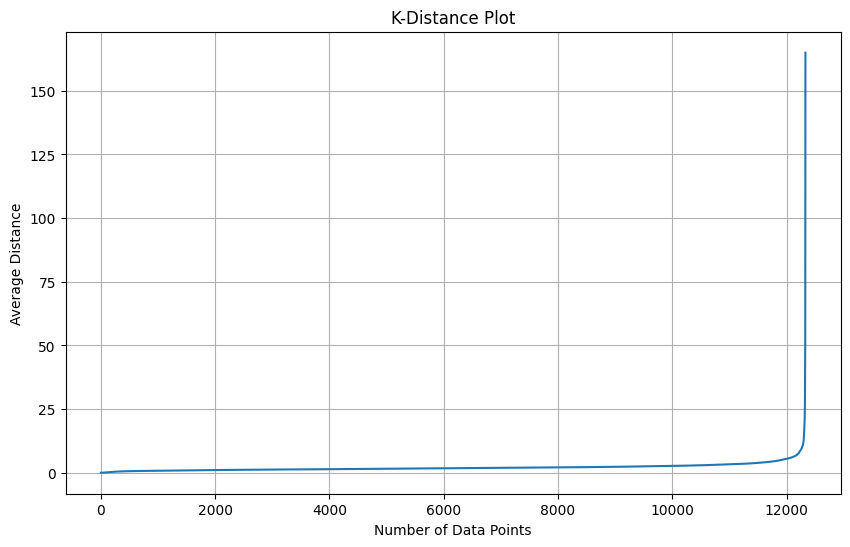

In [28]:
# Compute the k-distance plot
from sklearn.neighbors import NearestNeighbors

# Determine the optimal k using the k-distance plot
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df)
distances, _ = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
average_distances = distances.mean(axis=1)

# Plot the k-distance plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(df) + 1), average_distances)
plt.xlabel("Number of Data Points")
plt.ylabel("Average Distance")
plt.title("K-Distance Plot")
plt.grid()
plt.show()

#mais ou menos em 12k

In [33]:
epsilon = average_distances[12000]

In [45]:
X = df.values

In [47]:
db = DBSCAN(eps=epsilon, min_samples=10).fit(X)

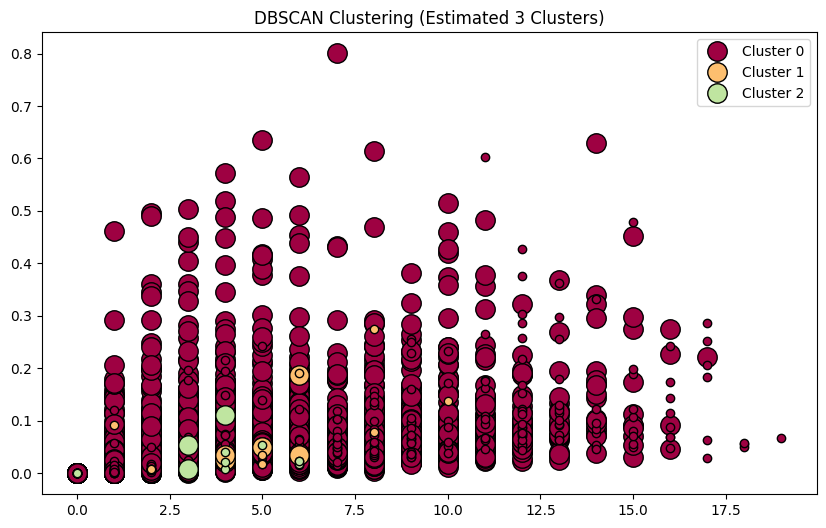

In [48]:
# Visualize the DBSCAN clusters
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Create unique colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# Plot the clusters
plt.figure(figsize=(10, 6))
for k, col in zip(range(n_clusters), colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14, label=f'Cluster {k}')
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN Clustering (Estimated {n_clusters} Clusters)')
plt.legend(loc='upper right')
plt.show()

In [ ]:
https://www.kaggle.com/code/mamun18/final-project-online-shoppers-intention#Data-Preprocessing